# Classify images of clothing

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2022-11-22 08:21:39.803811: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-22 08:21:40.463805: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-22 08:21:40.529897: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-22 08:21:40.529934: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

2.10.0


## Import the Fashion MNIST dataset


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

The dataset returns four NumPy arrays:
- The `train_images` and `train_labels` arrays are the training set
- The model is tested against the test set, the `test_images` and `test_labels` arrays

In [3]:
class_names = ['T-shirt/top', 'Trowser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore data

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## Preprocessing

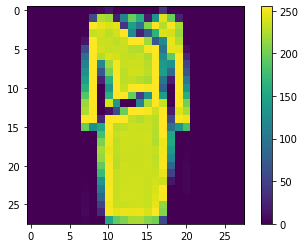

In [15]:
plt.figure()
plt.imshow(train_images[-3])
plt.colorbar()
plt.grid(False)
plt.show()

#### Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#### To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

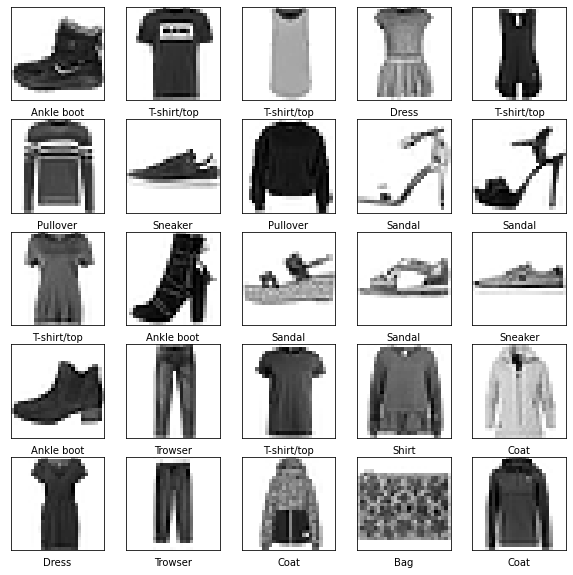

In [37]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building the model
Building the neural network requires configuring the layers of the model, then compiling the model

### Set up the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [18]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(128, activation='relu'),
                            tf.keras.layers.Dense(10)
                            ])

2022-11-22 08:24:59.880339: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-22 08:24:59.880602: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-22 08:24:59.880626: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nsl54): /proc/driver/nvidia/version does not exist
2022-11-22 08:24:59.881114: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


`tf.keras.layers.Flatten` transforms the format of the image froma a two dimensional array(28x28) to a one dimensional array(28\*28=784).This layer has no parameters to learn and only reformats the data.
<br><br>
The network also consists of two `tf.keras.layers.Dense` layers. These are **densely** connected or fully connected neural layers. The first `Dense` layer has 128 nodes. The second(last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model
- **Loss function** measures how accurate the model is during training. This function has to be minimized to steer the model to the right direction
- **Optimizer** is how the model is updated based on the data it sees and its loss function
- **Metrics** is used to monitor the training and testing steps

In [20]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

## Train
1. Feed the training data to the model (`train_images` & `train_labels`)
2. The model learns to associate images and labels
3. Ask the model to make predictions about a test set (`test_images`)
4. Verify the predictions match the labels from the `test_labels` array

### Feed the model
`model.fit` method fits the model to the training data:

In [24]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 1s 719us/step - loss: 0.1386 - accuracy: 0.9481
Epoch 2/50
1875/1875 [==============================] - 1s 714us/step - loss: 0.1326 - accuracy: 0.9498
Epoch 3/50
1875/1875 [==============================] - 1s 709us/step - loss: 0.1331 - accuracy: 0.9488
Epoch 4/50
1875/1875 [==============================] - 1s 712us/step - loss: 0.1284 - accuracy: 0.9521
Epoch 5/50
1875/1875 [==============================] - 1s 709us/step - loss: 0.1270 - accuracy: 0.9523
Epoch 6/50
1875/1875 [==============================] - 1s 696us/step - loss: 0.1242 - accuracy: 0.9537
Epoch 7/50
1875/1875 [==============================] - 1s 705us/step - loss: 0.1252 - accuracy: 0.9523
Epoch 8/50
1875/1875 [==============================] - 1s 698us/step - loss: 0.1191 - accuracy: 0.9556
Epoch 9/50
1875/1875 [==============================] - 1s 703us/step - loss: 0.1174 - accuracy: 0.9563
Epoch 10/50
1875/1875 [==============================] - 1s 700u

### Evaluate accuracy
Compare to the `test_images`

In [66]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
test_acc

313/313 - 0s - loss: 0.6851 - accuracy: 0.8894 - 154ms/epoch - 493us/step


0.8894000053405762

The model overfits

## Make predictions
With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [32]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [67]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 459us/step


In [35]:
predictions[0]

array([2.1496245e-22, 3.3384886e-27, 1.6752149e-15, 0.0000000e+00,
       1.5415445e-30, 1.0113478e-07, 6.1702030e-24, 1.1327137e-08,
       1.8421886e-22, 9.9999982e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [41]:
np.argmax(predictions[0])

9

#### Graph

In [45]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
              color=color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
        
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

## Verify predictions


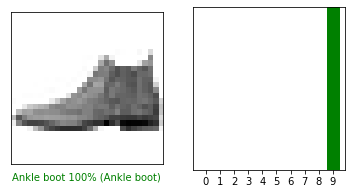

In [46]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

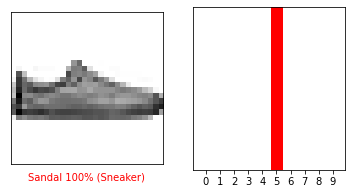

In [59]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

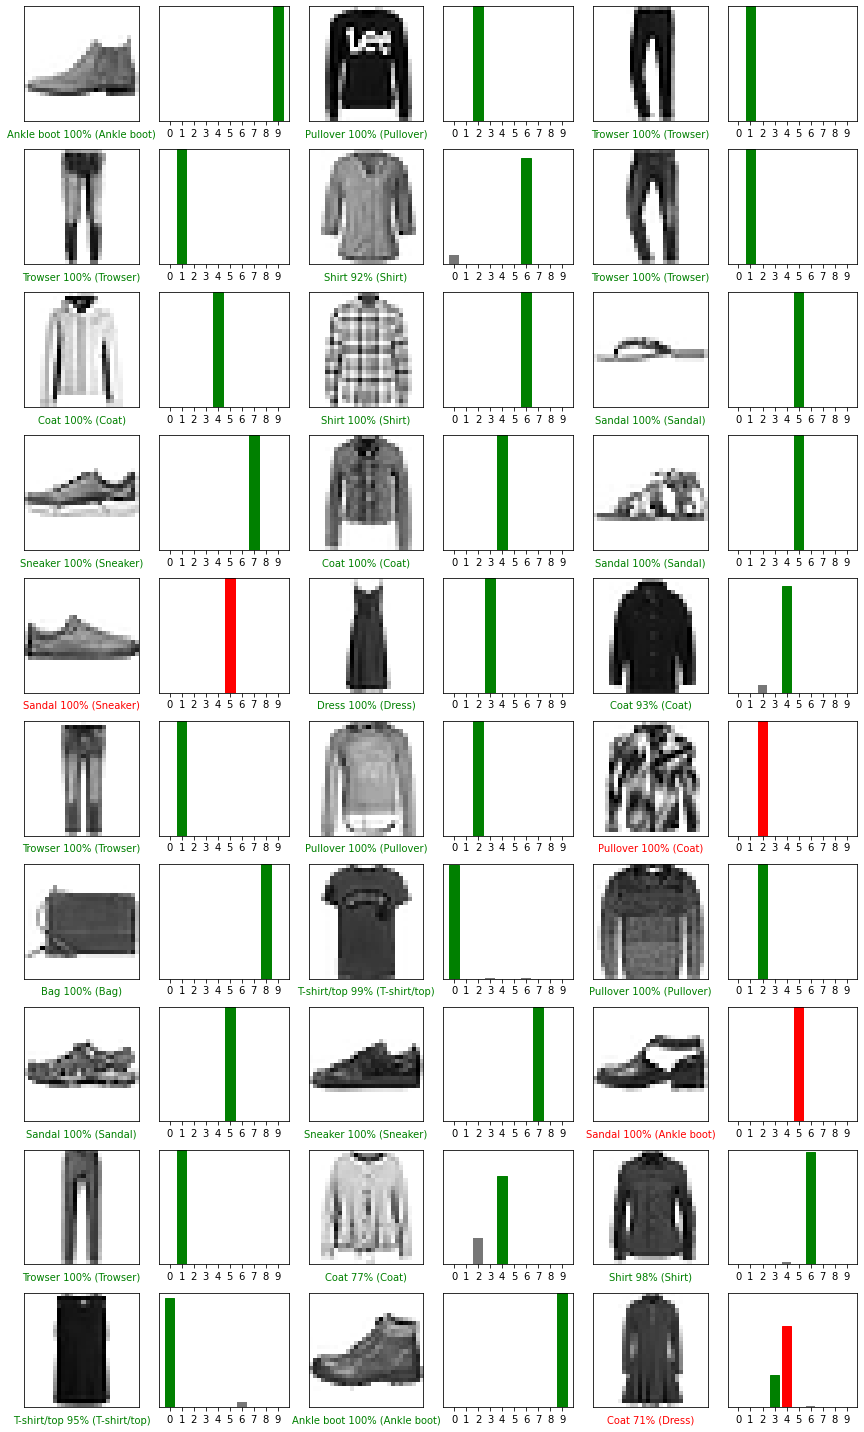

In [62]:
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
    
plt.tight_layout()
plt.show()

## Use the trained model

In [130]:
test_img_index = 99
img = test_images[test_img_index]
print(img.shape)

(28, 28)


In [131]:
# Add the image to a batch where it's the only member
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [132]:
prediction_single = probability_model.predict(img, verbose=2)
print(prediction_single)

1/1 - 0s - 11ms/epoch - 11ms/step
[[4.1790297e-08 1.9566765e-17 9.6506697e-01 5.8437248e-15 5.3417776e-04
  3.0498650e-20 3.4398742e-02 9.6413280e-15 3.3428416e-21 1.9070325e-12]]


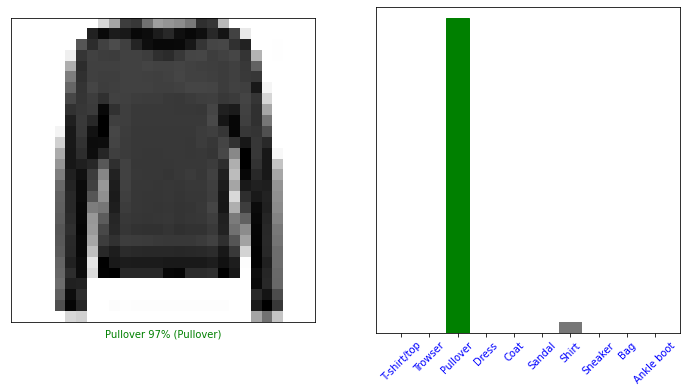

In [134]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_image(test_img_index, prediction_single[0], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(test_img_index, prediction_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45, color='blue')
plt.show()

In [137]:
# Predictions for our (only) image in the batch
class_names[np.argmax(prediction_single[0])]

'Pullover'